# Contenu
### 1. Visualiser les données météo
1.1. Comment la teméprature du janvier et de juin changeait au de 1829 à 2020
1.2. Température quotidienne au cours de 2020
1.3. Température moyenne de 1829 à 2020
1.4. Caractèristiques générales

### 2. Phénomènes météorologiques extrêmes

### 3. Cartographier les météo données
1. Mapping weather data
        - bibliothèque JavaScript libre de cartographie Leaflet;
        - Python library Folium for visualizing geospatial data;
        - API OpenWeatherMap (température actuelle)

### 4. Dynamique de température par heure

## 1. Température 
### 1.1. Fluctuation thérmiques durant janvier 2020

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import Search
import json
from requests import get
import html
import webbrowser
from datetime import datetime
from plotly.offline import plot
from plotly.graph_objs import Scatter

In [2]:
data = pd.read_csv('data/everyday_temp2020.csv', sep=';')
data.head()

,month,day,t_min,t_aver,t_max,ecart_norm,precip_mm
0,January,1,-40.8,-39.6,-37.9,-0.3,0.2
1,January,2,-39.7,-37.1,-32.7,2.2,0.3
2,January,3,-37.2,-34.1,-32.5,5.1,0.0
3,January,4,-37.5,-35.1,-32.9,4.1,0.6
4,January,5,-34.9,-33.0,-30.8,6.2,0.7


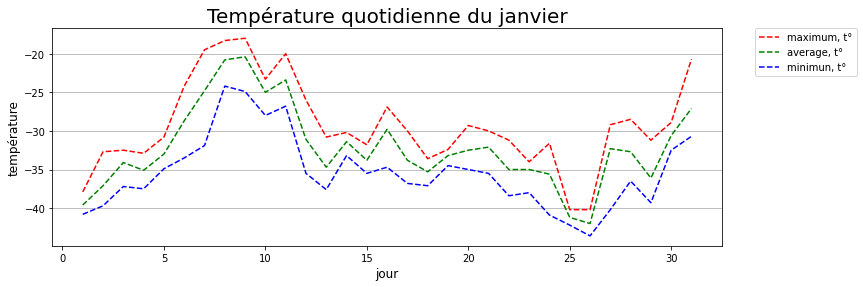

In [3]:
plt.rcParams['figure.figsize'] = [12, 4]

plt.title('Température quotidienne du janvier', fontsize=20)
plt.xlabel('jour', fontsize=12)
plt.ylabel('température', fontsize=12)

# number of days in Janauary
number_days = data[data.month == 'January'].day
number_days = np.array(number_days)

# max temperature by day
max_temp = data[data.month == 'January'].t_max
max_temp = np.array(max_temp)
plt.plot(number_days, max_temp, 'r--', label="maximum, t°")

# average temperature by day
average = data[data.month == 'January'].t_aver
average = np.array(average)
plt.plot(number_days, average, 'g--', label="average, t°")

# min temperature by day
min_temp = data[data.month == 'January'].t_min
min_temp = np.array(min_temp)
plt.plot(number_days, min_temp, 'b--', label='minimun, t°')
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

### 1.2. Température quotidienn de 2020
##### Min, max and average values

In [4]:
days = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
     14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
     25, 26, 27, 28, 29, 30, 31]
months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August', 
          'September', 'October', 'November', 'December']

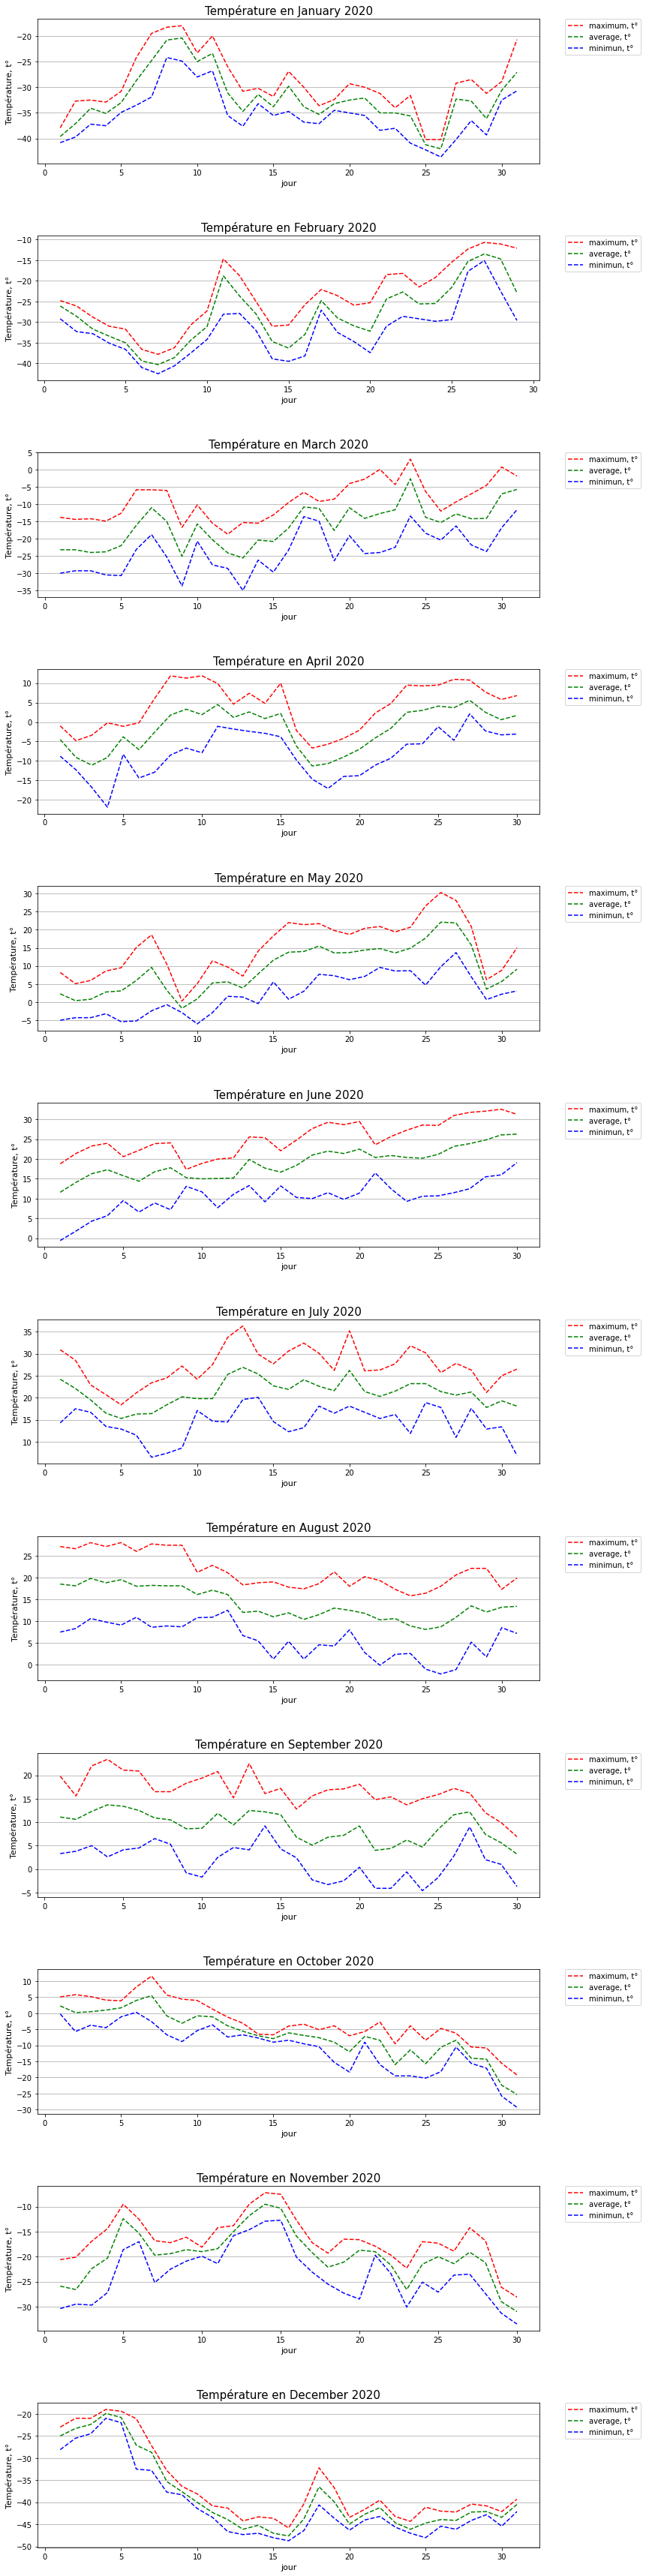

In [5]:
fig, axs = plt.subplots(12, figsize=(12, 62))
# plt.rcParams['figure.figsize'] = [8, 32]
# space between plots
plt.subplots_adjust(hspace=0.5)

ploty = 0
for i in months:
    # number of days in current month
    number_days = data[data.month == i].day
    number_days = np.array(number_days)
    
    # labels
    axs[ploty].set_xlabel('jour', fontsize=11)
    axs[ploty].set_ylabel('Température, t°', fontsize=11)
    axs[ploty].set_title(f'Température en {i} 2020', fontsize=15)

    # temperature by day: max
    max_temp = data[data.month == i].t_max
    max_temp = np.array(max_temp)
    axs[ploty].plot(number_days, max_temp, 'r--', label="maximum, t°")
   
    # temperature by day: average
    average = data[data.month == i].t_aver
    average = np.array(average)
    axs[ploty].plot(number_days, average, 'g--', label="average, t°")

    # temperature by day: min
    min_temp = data[data.month == i].t_min
    min_temp = np.array(min_temp)
    axs[ploty].plot(number_days, min_temp, 'b--', label='minimun, t°')
    axs[ploty].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
    axs[ploty].grid(axis='y')

    ploty += 1

### 1.3. Average temperature from 1829 to 2020

#### 1.3.1. Dynamics of average temperature for every month from 1829 to 2020. 
How average temperature of January and June changed over all years from 1829 to 2020?

In [6]:
import seaborn as sns

In [7]:
data = pd.read_csv('data/ykt_avg_temp_from1829.txt', sep=';')
data.head(5)

,stat,year,jan,feb,mar,avr,may,jun,jul,aug,sept,oct,nov,dec
0,24959,1829,NaN,NaN,NaN,NaN,3.1,13.9,21.0,15.9,4.6,-9.8,-28.4,-37.9
1,24959,1830,-42.0,-36.8,-24.8,-9.1,4.7,10.7,16.6,15.8,1.6,-14.4,-25.6,-41.0
2,24959,1831,-41.6,-35.2,-26.0,-10.8,2.0,13.8,17.1,12.8,4.2,-7.9,-35.5,-36.9
3,24959,1832,-40.7,-32.3,-22.6,-4.6,2.6,12.5,12.8,10.8,2.2,-8.4,-31.0,-46.1
4,24959,1833,-43.0,-35.3,-24.3,-10.7,4.8,12.4,14.8,14.8,4.9,-12.2,-23.8,-38.5


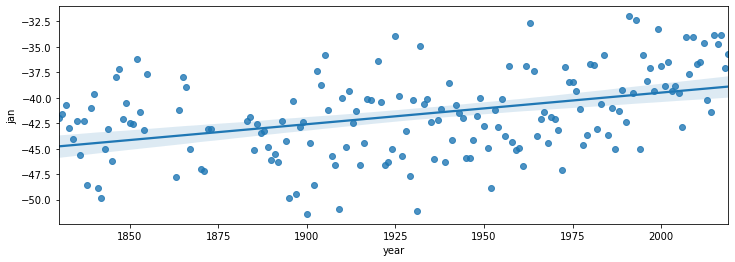

In [8]:
# January
sns.regplot(x=data.year,y=data.jan, data=data, fit_reg=True);

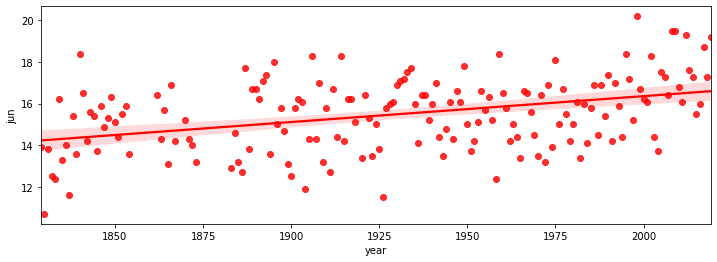

In [9]:
# June
sns.regplot(x=data.year,y=data.jun, data=data, fit_reg=True, color='r');

#### 1.3.2. Température moyenne de 1829 à 2020

In [10]:
data = pd.read_csv('data/ykt_avg_temp_from1829.txt', sep=';')
data.head()

,stat,year,jan,feb,mar,avr,may,jun,jul,aug,sept,oct,nov,dec
0,24959,1829,NaN,NaN,NaN,NaN,3.1,13.9,21.0,15.9,4.6,-9.8,-28.4,-37.9
1,24959,1830,-42.0,-36.8,-24.8,-9.1,4.7,10.7,16.6,15.8,1.6,-14.4,-25.6,-41.0
2,24959,1831,-41.6,-35.2,-26.0,-10.8,2.0,13.8,17.1,12.8,4.2,-7.9,-35.5,-36.9
3,24959,1832,-40.7,-32.3,-22.6,-4.6,2.6,12.5,12.8,10.8,2.2,-8.4,-31.0,-46.1
4,24959,1833,-43.0,-35.3,-24.3,-10.7,4.8,12.4,14.8,14.8,4.9,-12.2,-23.8,-38.5


In [11]:
# create a list of months from "data" dataframe
months = list((data.columns).drop(['stat', 'year']))
# average temperature by month from 1829 to 2020:
avr_temp_dict = {k: [np.mean(data[k])] for k in months}
avr_temp_df = pd.DataFrame(data=avr_temp_dict)

# make columns being rows and rows being columns
avr_temp_dict = {'months': months, 'temp': list(round(avr_temp_df.iloc[0]))}
avr_temp_df = pd.DataFrame(data=avr_temp_dict)
avr_temp_df

,months,temp
0,jan,-42.0
1,feb,-36.0
2,mar,-22.0
3,avr,-7.0
4,may,6.0
5,jun,15.0
6,jul,19.0
7,aug,15.0
8,sept,6.0
9,oct,-8.0


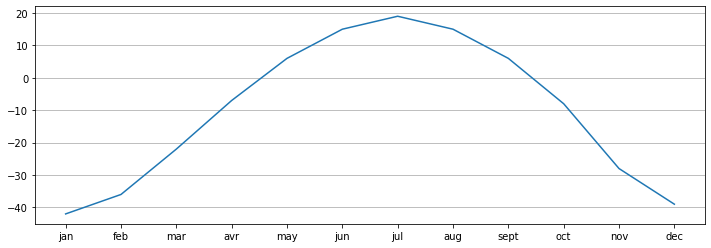

In [12]:
# ploting the graph
plt.plot(avr_temp_df.months, avr_temp_df.temp)
plt.rcParams['figure.figsize'] = [12, 4]
plt.grid(axis='y')
plt.show()

## Caractèristiques générales
    - Number of sunny days in each month
    - Number of rainy days in each month
    - Number of windy days in each month
    - Number of days with the smoke in summer (due to the forest fires)
    - Number of days with brumes in winter
    - The extrems temperatures/anomalies over all the years
    - Number of days with the tempeature greater than 30°C and less than 45°C
    - atmospheric pressure by day for each month (2020?)

### Load the data

In [13]:
# We'll going to use <...> data
data = pd.read_csv('data/everyday_temp2020.csv', sep=';')
data.head(5)

,month,day,t_min,t_aver,t_max,ecart_norm,precip_mm
0,January,1,-40.8,-39.6,-37.9,-0.3,0.2
1,January,2,-39.7,-37.1,-32.7,2.2,0.3
2,January,3,-37.2,-34.1,-32.5,5.1,0.0
3,January,4,-37.5,-35.1,-32.9,4.1,0.6
4,January,5,-34.9,-33.0,-30.8,6.2,0.7


#### Number of sunny days in each month

June: 10
July: 12
August: 11

https://сезоны-года.рф/%D0%BA%D0%BB%D0%B8%D0%BC%D0%B0%D1%82%20%D0%AF%D0%BA%D1%83%D1%82%D0%B8%D0%B8.html

#### Coldest and hotest days of the last year (2020)

In [14]:
# hotest day of 2020 was the July 13. It's been 36.3°C
data[data.t_max == max(data.t_max)]

,month,day,t_min,t_aver,t_max,ecart_norm,precip_mm
194,July,13,19.6,26.9,36.3,7.0,0.3


In [15]:
# coldest day of 2020 was the December 16. It's been -48.7°C
data[data.t_min == min(data.t_min)]

,month,day,t_min,t_aver,t_max,ecart_norm,precip_mm
350,December,16,-48.7,-47.6,-45.8,-9.6,0.0


#### Number of days with the tempeature greater than 30°C and less than 45°C

In [16]:
# Number of days with the tempeature less than 45°C
data[data.t_aver <= -45]

,month,day,t_min,t_aver,t_max,ecart_norm,precip_mm
347,December,13,-47.3,-46.1,-44.2,-8.6,0.0
348,December,14,-47.0,-45.2,-43.3,-7.5,0.0
349,December,15,-48.0,-47.0,-43.6,-9.1,0.0
350,December,16,-48.7,-47.6,-45.8,-9.6,0.0
358,December,24,-47.0,-46.1,-44.3,-7.1,0.0


In [17]:
# Number of days with the tempeature greater than 30°C
data[data.t_max >= 35]

,month,day,t_min,t_aver,t_max,ecart_norm,precip_mm
194,July,13,19.6,26.9,36.3,7.0,0.3
201,July,20,18.1,26.2,35.2,6.5,2.0


### atmospheric pressure by day for each month (2020?)

In [18]:
precip = pd.read_csv("data/ykt_precip_from1966.txt", sep=';')
print("number of rows and columns:", precip.shape)
precip.head()

number of rows and columns: (54, 14)


,station,year,jan,feb,mar,avr,may,jun,jul,aug,sept,oct,nov,dec
0,24959,1966,7,1,6,2,5,7,11,9,4,8,4.0,4.0
1,24959,1967,4,2,3,1,9,8,6,6,6,7,7.0,5.0
2,24959,1968,0,2,3,2,7,8,7,5,6,3,8.0,1.0
3,24959,1969,3,0,0,4,1,9,8,3,6,4,7.0,3.0
4,24959,1970,1,2,1,8,6,5,3,7,6,15,7.0,2.0


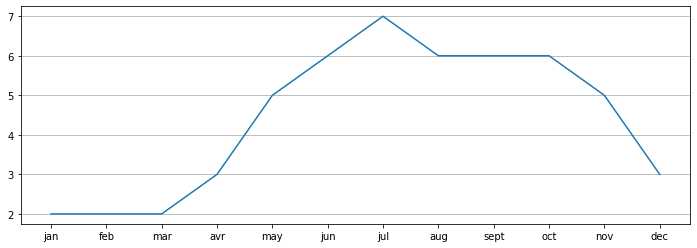

In [19]:
# create a list of months from "data" dataframe
months = list((precip.columns).drop(['station', 'year']))
# average number of days woth the precipitations by month from 1866 to 2020:
avr_precip_dict = {k: [np.mean(precip[k])] for k in months}
avr_precip_df = pd.DataFrame(data=avr_precip_dict)

# make columns being rows and rows being columns
avr_precip_dict = {'months': months, 'temp': list(round(avr_precip_df.iloc[0]))}
avr_precip_df = pd.DataFrame(data=avr_precip_dict)
avr_precip_df

# ploting the graph
plt.plot(avr_precip_df.months, avr_precip_df.temp)
plt.rcParams['figure.figsize'] = [12, 4]
plt.grid(axis='y')
plt.show()

### 1.2. Phenomènes météorologiques extrêmes

brumes, routes glacées --> combien de jours, quand

feux forestières, ennondations --> carts, timelines

## 2. Cartographier la témpérature
#### 2.1. API OpenWeatherMap

We'll display the current weather for several cities on map. Map was made using the Leaflet library and OpwnWeatheMap API data.

OpenWeatherMap is an online service, owned by OpenWeather Ltd, that provides global weather data, including current weather data, forecasts, nowcasts and historical data (starting from 1979), utilising meteorological broadcast services and raw data from airport weather stations, radar stations and other weather stations.

More about: https://en.wikipedia.org/wiki/OpenWeatherMap

In [20]:
url = 'http://api.openweathermap.org/data/2.5/find?lat=47.5&lon=2.5&cnt=10&units=metric&appid=969bd7bdde2aa8690b83ebfa2b4056cb'

In [21]:
stations = get(url).json()
temps, pres, humid, wind = [], [], [], []

lons = [station['coord']['lon'] for station in stations['list']]
lats = [station['coord']['lat'] for station in stations['list']]
wsnames = [html.escape(station['name']) for station in stations['list']]
for data in stations['list']:
    temps.append(str(data['main']['temp']))
    pres.append(str(data['main']['pressure']))    
    humid.append(str(data['main']['humidity']))    
    wind.append(str(data['wind']['speed']))    

In [22]:
map_weather = folium.Map(location=[47.5, 2.5], zoom_start=9)
for n in range(len(lons)-1):
    # hcol = colourgrad(tmin, tmax, float(temps[n]))
    folium.CircleMarker([lats[n], lons[n]],
                        radius = 5,
                        popup = wsnames[n]+': '+
                        '\nTemperature: ' + temps[n]+
                        '\nPressure: ' + pres[n]+
                        '\nHumidity: ' + humid[n]+
                        '\nWind speed: ' + wind[n]).add_to(map_weather)


In [23]:
map_weather

Customize map. Add the current meteo data into markers' pupups and design it using iframe

In [24]:
# string represention of date
timestamp = 1528797322
date_time = datetime.fromtimestamp(timestamp).now()

# today's date in str to show inside of the popups
today_str = date_time.strftime("%d %B %Y")

In [25]:
# weather from OpenWeatherMap api
url = 'http://api.openweathermap.org/data/2.5/find?lat=47.5&lon=2.5&cnt=10&units=metric&appid=969bd7bdde2aa8690b83ebfa2b4056cb'

In [26]:
stations = get(url).json()

In [28]:
# current meteo data from OWM's json
temps, pres, humid, wind, desc, icon = [], [], [], [], [], []
lons = [station['coord']['lon'] for station in stations['list']]
lats = [station['coord']['lat'] for station in stations['list']]
wsnames = [html.escape(station['name']) for station in stations['list']]
for data in stations['list']:
    temps.append(str(data['main']['temp']))
    pres.append(str(data['main']['pressure']))
    humid.append(str(data['main']['humidity']))
    wind.append(str(data['wind']['speed']))
    desc.append(str(data['weather'][0]['description']))
    icon.append(str(data['weather'][0]['icon']))

In [29]:
# map using Python's folium library
m = folium.Map(location=[47.621, 2.4926], zoom_start=11)

In [30]:
# add the data to map's popups
for n in range(len(lons)-1):
    html=f'''
    <h5>{today_str}</h5>
    <!-- <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css"> -->
    <script src='https://kit.fontawesome.com/a076d05399.js'></script>
    <h4><b>{wsnames[n]}</b></h4>
    <p style="font-size:11pt;">{temps[n]}°C<i class="fas fa-sun" style="font-size:25px;color:black"></i>{desc[n]}</p>
    <p style="font-size:11pt;">Pressure: {pres[n]}</p>
    <p style="font-size:11pt;">Humidity: {humid[n]}%</p>
    <p style="font-size:11pt;">Wind speed: {wind[n]} km/h</p>
    '''
    iframe = folium.IFrame(html=html, width=250, height=230)
    popup = folium.Popup(iframe, min_width=100, max_width=2650)
    folium.Marker([lats[n], lons[n]],
                  radius = 5,
                  popup = popup).add_to(m)

m

## 3. Durée du jour, le levée et le couchée du soleil

In [31]:
light = pd.read_csv('data/light_2021.csv', sep=';')
light.head()

,day,sunrise,sunset,true_noon,daylight_hours,month,day_int,month_int
0,"Ср, 1 января",9:44,15:03,12:24,5:19:30,Jan,1,1
1,"Чт, 2 января",9:43,15:05,12:24,5:21:44,Jan,2,1
2,"Пт, 3 января",9:43,15:07,12:25,5:24:10,Jan,3,1
3,"Сб, 4 января",9:42,15:09,12:25,5:26:46,Jan,4,1
4,"Вс, 5 января",9:41,15:10,12:26,5:29:34,Jan,5,1


In [33]:
now = datetime.now()
now_day, now_month = now.day, now.month

count = 0
for i, j in zip(light.day_int, light.month_int):
    if i == now_day and j == now_month:
        print(f'Today is {light.day_int[count]} {light.month[count]}\
                \nSunrise: {light.sunrise[count]}\
                \nTrue noon: {light.true_noon[count]}\
                \nSunset: {light.sunset[count]}\
                \nDaylight hours: {light.daylight_hours[count]}')
    count += 1

Today is 28 Aug                
Sunrise: 4:59                 
True noon: 12:22                 
Sunset: 19:44                 
Daylight hours: 14:45:02 


## Webographie:

1.Pyplot tutorial:
https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html

2.Legend guide:
https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html

3.Map search:
https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/plugin-Search.ipynb

4.
https://python-visualization.github.io/folium/modules.html